# ResNet50
This notebook will train the ResNet50 model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/Shareddrives/Visual Information Processing/'

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import random
from random import shuffle 
import collections
import io
import math

In [4]:
!pip install Keras-Applications

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [5]:
from keras.applications.resnet import ResNet50
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dropout, Input, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [6]:
FLOWERS_DIR = path + 'Annotated-FlowerData-30'

In [7]:
H, W = 224, 224
BATCH_SIZE = 64
EPOCHS = 100

TRAIN_FRACTION = 80
RANDOM_SEED = 2018

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    FLOWERS_DIR,
    target_size=(H, W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=RANDOM_SEED
)

validation_generator = test_datagen.flow_from_directory(
    FLOWERS_DIR,
    target_size=(H, W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=RANDOM_SEED
)

Found 1982 images belonging to 30 classes.
Found 491 images belonging to 30 classes.


## ResNet50

In [9]:
base_model = ResNet50(
    input_shape=(H, W, 3), 
    weights='imagenet',
    include_top=False, 
    pooling='avg',
)

base_model.trainable = False

output_class = 30

model = Sequential([
    base_model,
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(30, activation='softmax')
])

model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 30)                15390     
                                                                 
Total params: 27,275,678
Trainable params: 3,687,966
Non-trainable params: 23,587,712
_____________________________________

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint(path + 'ResNet50_checkpoint.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [12]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = train_generator.n / BATCH_SIZE, 
    validation_data = validation_generator,
    validation_steps = validation_generator.n / BATCH_SIZE,
    epochs = 100,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
31/30 [==============================] - ETA: 0s - loss: 3.4673 - accuracy: 0.0333 
Epoch 00001: val_loss improved from inf to 3.38028, saving model to /content/drive/Shareddrives/Visual Information Processing/ResNet50_model.h5
30/30 [==============================] - 782s 24s/step - loss: 3.4673 - accuracy: 0.0333 - val_loss: 3.3803 - val_accuracy: 0.0530 - lr: 0.0010
Epoch 2/100
31/30 [==============================] - ETA: 0s - loss: 3.3455 - accuracy: 0.0419
Epoch 00002: val_loss improved from 3.38028 to 3.32337, saving model to /content/drive/Shareddrives/Visual Information Processing/ResNet50_model.h5
30/30 [==============================] - 44s 1s/step - loss: 3.3455 - accuracy: 0.0419 - val_loss: 3.3234 - val_accuracy: 0.0489 - lr: 0.0010
Epoch 3/100
31/30 [==============================] - ETA: 0s - loss: 3.2964 - accuracy: 0.0540
Epoch 00003: val_loss improved from 3.32337 to 3.28544, saving model to /content/drive/Shareddrives/Visual Information Processing/ResNet

## Evaluation

In [14]:
def plot_accuracy_loss(history):
    
    ### Plot the accuracy and the loss during the training of the nn.
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', 
             label = "Training Accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', 
             label = "Validation Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', 
             label = "Training Loss")
    plt.plot(history.history['val_loss'], 'ro--', 
             label = "Validation Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

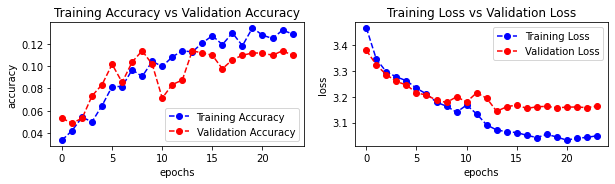

In [15]:
plot_accuracy_loss(history)

## Saving the Model

In [13]:
model.save(path +'ResNet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
